In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pylab import subplots
import pandas as pd
from matplotlib import cm
from IPython.display import display, HTML
import operator as op

In [15]:
data_dir = '../data/'

In [16]:
df_nips = pd.read_csv(data_dir + 'nips_2016-2020.csv')

In [17]:
df_nips_citations = pd.read_csv(data_dir + 'nips_citations.csv')

In [18]:
df_nips_whole = pd.merge(df_nips, df_nips_citations, on='TITLE')

In [19]:
df_nips_whole.head()

,YEAR_x,TITLE,Authors,Paper Link,ABSTRACT,Affiliations,YEAR_y,citations
0,2017,Implicit Regularization in Matrix Factorization,"Suriya Gunasekar, Blake Woodworth, Srinadh Bho...",https://nips.cc/Conferences/2017/Schedule?show...,We study implicit regularization when optimizi...,"['TTI Chicago', 'TTI-Chicago', 'Google Researc...",2017,230
1,2017,Near-linear time approximation algorithms for ...,"Jason Altschuler, Jonathan Niles-Weed, Philipp...",https://nips.cc/Conferences/2017/Schedule?show...,Computing optimal transport distances such as ...,"['MIT', 'MIT', 'MIT']",2017,320
2,2017,On Frank-Wolfe and Equilibrium Computation,"Jacob D Abernethy, Jun-Kun Wang",https://nips.cc/Conferences/2017/Schedule?show...,We consider the Frank-Wolfe (FW) method for co...,"['University of Michigan', 'Georgia Institute ...",2017,31
3,2017,Greedy Algorithms for Cone Constrained Optimiz...,"Francesco Locatello, Michael Tschannen, Gunnar...",https://nips.cc/Conferences/2017/Schedule?show...,Greedy optimization methods such as Matching P...,"['MPI Tübingen - ETH Zürich', 'ETH Zurich', 'E...",2017,25
4,2017,When Cyclic Coordinate Descent Outperforms Ran...,"Mert Gurbuzbalaban, Asuman Ozdaglar, Pablo A P...",https://nips.cc/Conferences/2017/Schedule?show...,The coordinate descent (CD) method is a classi...,"['Rutgers University', 'Massachusetts Institut...",2017,23


In [20]:
years = df_nips['YEAR'].unique()

Text(0.5, 1.0, 'Number of papers published in Neurips')

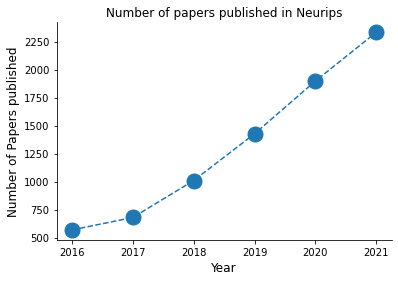

In [21]:
pub_per_year = dict()
for i in years: 
    pub_per_year.update({i:0})

for i in range(len(df_nips)): 
    pub_per_year[df_nips['YEAR'][i]] +=1


fig,axs = subplots(1,1) 
axs.plot(years, pub_per_year.values(),marker = 'o', linestyle='--', markersize = 15)
axs.set_xlabel('Year', fontsize = 12)
axs.set_ylabel('Number of Papers published',fontsize = 12)
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)
axs.set_title('Number of papers published in Neurips')

In [22]:
bins = [0, 100, 500, 2000,40000]

In [23]:
nips_2017 = df_nips_citations[df_nips_citations['YEAR']==2017].sort_values(by='citations', ascending = False)
nips_2018 = df_nips_citations[df_nips_citations['YEAR']==2018].sort_values(by='citations', ascending = False)
nips_2019 = df_nips_citations[df_nips_citations['YEAR']==2019].sort_values(by='citations', ascending = False)
print('Neurips {}'.format(2017))
display(HTML(nips_2017[['TITLE', 'citations']].head(n=10).to_html(index=False)))
print('Neurips {}'.format(2018))
display(HTML(nips_2018[['TITLE', 'citations']].head(n=10).to_html(index=False)))
print('Neurips {}'.format(2019))
display(HTML(nips_2019[['TITLE', 'citations']].head(n=10).to_html(index=False)))

Neurips 2017


TITLE,citations
Attention is All you Need,31339
Improved Training of Wasserstein GANs,5834
GANs Trained by a Two Time-Scale Update Rule Converge to a Local Nash Equilibrium,3971
Simple and Scalable Predictive Uncertainty Estimation using Deep Ensembles,2058
Unsupervised Image-to-Image Translation Networks,1882
Self-Normalizing Neural Networks,1733
Multi-Agent Actor-Critic for Mixed Cooperative-Competitive Environments,1663
Hindsight Experience Replay,1258
A simple neural network module for relational reasoning,1201
Deep Sets,1189


Neurips 2018


TITLE,citations
Neural Ordinary Differential Equations,1653
Glow: Generative Flow with Invertible 1x1 Convolutions,1309
Neural Tangent Kernel: Convergence and Generalization in Neural Networks,1109
PointCNN: Convolution On X-Transformed Points,1000
How Does Batch Normalization Help Optimization?,847
Conditional Adversarial Domain Adaptation,800
Generalized Cross Entropy Loss for Training Deep Neural Networks with Noisy Labels,781
Visualizing the Loss Landscape of Neural Nets,765
Sanity Checks for Saliency Maps,761
CatBoost: unbiased boosting with categorical features,743


Neurips 2019


TITLE,citations
"PyTorch: An Imperative Style, High-Performance Deep Learning Library",10576
XLNet: Generalized Autoregressive Pretraining for Language Understanding,3747
MixMatch: A Holistic Approach to Semi-Supervised Learning,931
ViLBERT: Pretraining Task-Agnostic Visiolinguistic Representations for Vision-and-Language Tasks,825
Cross-lingual Language Model Pretraining,813
"Adversarial Examples Are Not Bugs, They Are Features",774
SuperGLUE: A Stickier Benchmark for General-Purpose Language Understanding Systems,603
Unified Language Model Pre-training for Natural Language Understanding and Generation,598
GPipe: Efficient Training of Giant Neural Networks using Pipeline Parallelism,578
When does label smoothing help?,554


In [24]:
citations_2017 = df_nips_citations[df_nips_citations['YEAR']==2017]['citations']
citations_2018 = df_nips_citations[df_nips_citations['YEAR']==2018]['citations']
citations_2019 = df_nips_citations[df_nips_citations['YEAR']==2019]['citations']

c2017 = np.histogram(citations_2017, bins)
c2018 = np.histogram(citations_2018, bins)
c2019 = np.histogram(citations_2019, bins)

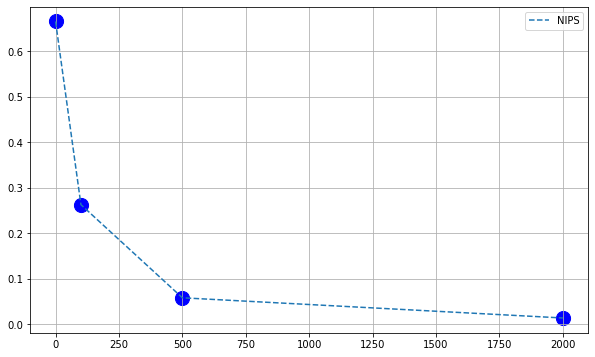

In [25]:
# colors = cm.Blues(np.linspace(0.3, 1, len(bins[:-1])))
plt.figure(figsize=(10,6))
plt.plot(c2017[1][:-1], c2017[0]/len(nips_2017), linestyle = '--',label='NIPS')
plt.grid()
for i,b in enumerate(bins[:-1]): 
    plt.scatter(b,c2017[0][i]/len(nips_2017), s = 200, color='blue')
plt.legend(fontsize = 10)
    
#4 conference in same graph, 4 different plots for years 

In [26]:
df_iclr = pd.read_csv(data_dir + 'ICLR-2017-18-19-21.csv')

In [27]:
df_whole = pd.concat([df_nips, df_iclr])
df_whole.head()

,YEAR,TITLE,Authors,Paper Link,ABSTRACT,Affiliations,Citations,Unnamed: 7
0,2016,Improved Dropout for Shallow and Deep Learning,"Zhe Li, Boqing Gong, Tianbao Yang",https://nips.cc/Conferences/2016/Schedule?show...,Dropout has been witnessed with great success ...,"['The University of Iowa', 'University of Cent...",NaN,NaN
1,2016,Communication-Optimal Distributed Clustering,"Jiecao Chen, He Sun, David Woodruff, Qin Zhang",https://nips.cc/Conferences/2016/Schedule?show...,Clustering large datasets is a fundamental pro...,"['Indiana University Bloomington', 'The Univer...",NaN,NaN
2,2016,On Robustness of Kernel Clustering,"Bowei Yan, Purnamrita Sarkar",https://nips.cc/Conferences/2016/Schedule?show...,Clustering is an important unsupervised learni...,"['University of Texas at Austin', 'U.C. Berkel...",NaN,NaN
3,2016,Combinatorial semi-bandit with known covariance,"Rémy Degenne, Vianney Perchet",https://nips.cc/Conferences/2016/Schedule?show...,The combinatorial stochastic semi-bandit probl...,"['Université Paris Diderot', 'Ensae - Criteo L...",NaN,NaN
4,2016,A posteriori error bounds for joint matrix dec...,"Nicolò Colombo, Nikos Vlassis",https://nips.cc/Conferences/2016/Schedule?show...,Joint matrix triangularization is often used f...,"['University College London', 'Adobe Research']",NaN,NaN


In [28]:
affiliations = np.asarray(df_whole['Affiliations'])

In [30]:
aff_dict = dict()
for i in range(len(affiliations)): 
    aff = affiliations[i].replace('[','').replace(']','').replace('The','').split(', ')
    for entry in aff:
        if entry not in aff_dict.keys():
            aff_dict.update({entry:1})
        else:
            aff_dict[entry] +=1

In [31]:
affil = sorted(aff_dict.items(), key = op.itemgetter(1))[::-1]

In [32]:
affil = dict(affil[:30])
affil['UCSD'] = affil.pop("'University of California")
affil['UCSD'] += aff_dict["'UCSD'"] + aff_dict["'UC San Diego'"] + aff_dict["'University of California San Diego'"]
affil = dict(sorted(affil.items(), key = op.itemgetter(1))[::-1])
affil.pop("'None'")
affil.pop("''")

319

Text(0.5, 1.0, 'Institutes most active in publications')

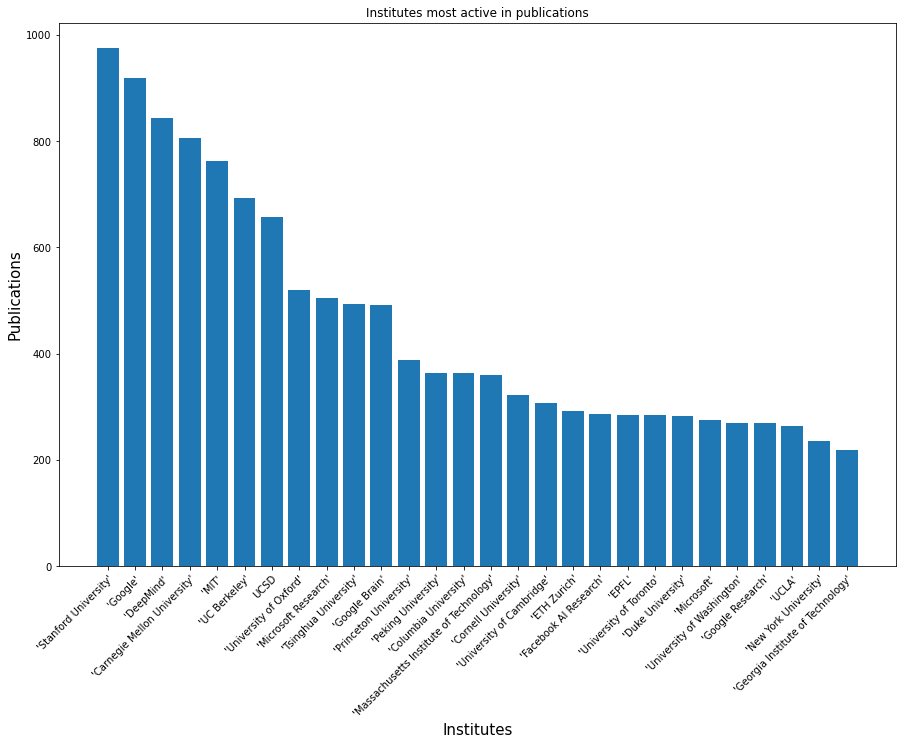

In [33]:
fig,ax = subplots(figsize=(15,10))
ax.bar(affil.keys(), affil.values())
ax.set_xlabel('Institutes', fontsize = 15)
ax.set_ylabel('Publications', fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.title('Institutes most active in publications')

In [41]:
authors = np.asarray(df_whole['Authors'])

In [42]:
author_dict = dict()
for row in authors: 
    row = row.split(', ')
    for entry in row: 
        if entry not in author_dict.keys():
            author_dict.update({entry:1})
        else: 
            author_dict[entry]+=1

In [43]:
author_dict = sorted(author_dict.items(), key = op.itemgetter(1))[::-1]

In [44]:
author_dict = dict(author_dict[:30])

Text(0.5, 1.0, 'Authors most active in publications')

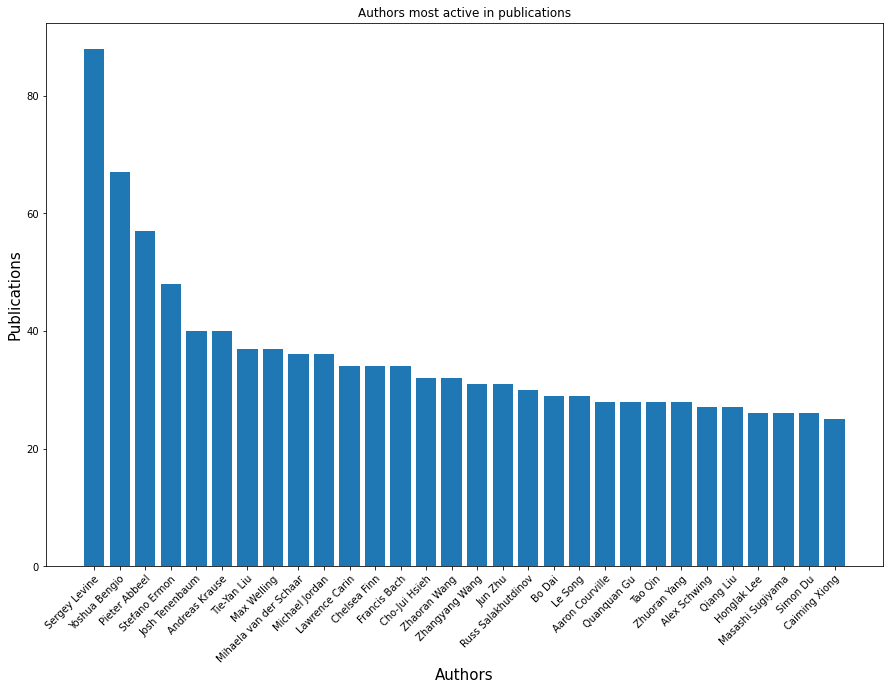

In [47]:
fig,ax = subplots(figsize = (15,10))
ax.bar(author_dict.keys(), author_dict.values())
ax.set_xlabel('Authors', fontsize = 15)
ax.set_ylabel('Publications', fontsize = 15)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
plt.title('Authors most active in publications')

#Try horizontal bar chart

In [51]:
affil_nips_2017 = np.asarray(df_nips[df_nips['YEAR']==2017]['Affiliations'])
affil_nips_2018 = np.asarray(df_nips[df_nips['YEAR']==2018]['Affiliations'])
affil_nips_2019 = np.asarray(df_nips[df_nips['YEAR']==2019]['Affiliations'])
affil_nips_2020 = np.asarray(df_nips[df_nips['YEAR']==2020]['Affiliations'])

affil_iclr_2017 = np.asarray(df_iclr[df_iclr['YEAR']==2017]['Affiliations'])
affil_iclr_2018 = np.asarray(df_iclr[df_iclr['YEAR']==2018]['Affiliations'])
affil_iclr_2019 = np.asarray(df_iclr[df_iclr['YEAR']==2019]['Affiliations'])
affil_iclr_2021 = np.asarray(df_iclr[df_iclr['YEAR']==2021]['Affiliations'])

In [52]:
affil_nips_2017

array(["['EPFL', 'University of Bern', 'EPFL, Switzerland']",
       "['Swiss Federal Institute of Technology Zurich (ETHZ)', 'ETH Zürich', 'ETH Zurich']",
       "['Carnegie Mellon University', 'CMU']",
       "['Facebook AI Research', 'Facebook']",
       "['University College London', 'University of Genova', 'University of Genova- MIT - IIT', 'IIT & UCL']",
       '[\'IRISA / University South Brittany\', "Université Côte d\'Azur", \'University of Saint-Etienne, Univ. Lyon, Lab. H Curien, France\', \'Université de Rouen Normandie\']',
       "['Tsinghua University', 'Stanford University', 'Tsinghua University', 'UIC']",
       "['Stanford University', 'Virginia Tech', 'FAIR and Georgia Tech', 'Stanford University & Google']",
       "['ETH Zurich', 'ETH Zurich', 'ETH Zurich']",
       "['ETH Zurich', 'SUTD', 'MIT']",
       "['Cornell University and Google Brain', 'Google Brain', 'Uber', 'Google Brain']",
       "['IDSIA', 'The Swiss AI Lab - IDSIA', 'Swiss AI Lab, IDSIA (USI & SUPSI

In [53]:
nips_2017,nips_2018,nips_2019,nips_2020 = [],[],[],[]
iclr_2017,iclr_2018,iclr_2019,iclr_2021 = [],[],[],[]
def get_names(arr, affil):
    assert isinstance(arr, list)
    for i in range(len(affil)): 
        row = str(affil[i]).replace('[','').replace(']','').replace('\n',',').split(', ')
        for entry in row:
            arr.append(entry.lower().replace("'",'').replace("'",'').replace('"',''))

get_names(nips_2017,affil_nips_2017)
get_names(nips_2018,affil_nips_2018)
get_names(nips_2019,affil_nips_2019)
get_names(nips_2020,affil_nips_2020)
get_names(iclr_2017, affil_iclr_2017)
get_names(iclr_2018, affil_iclr_2018)
get_names(iclr_2019, affil_iclr_2019)
get_names(iclr_2021, affil_iclr_2021)

In [55]:
uni_keywords = ['uni','tech','uc','mit','ui','eth','epfl','inst','college']

In [56]:
nips_university = {2017:0, 2018:0,2019:0,2020:0}
nips_industry = {2017:0, 2018:0,2019:0,2020:0}
years = list(nips_university.keys())
names = [nips_2017,nips_2018,nips_2019,nips_2020]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords): 
            nips_university[year] +=1
        else:
            nips_industry[year]+=1

In [57]:
nips_university

{2017: 1659, 2018: 2603, 2019: 3762, 2020: 5228}

In [58]:
nips_industry

{2017: 1003, 2018: 1528, 2019: 2229, 2020: 3138}

In [59]:
'uni' in 'university of technology sydney'

True

Text(0.5, 1.0, 'Publications by university and industry')

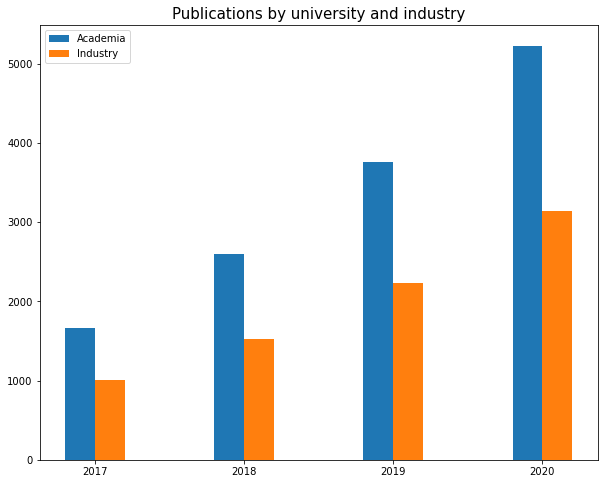

In [60]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(nips_university.keys()))
bar_width = 0.2
axs.bar(years, nips_university.values(), width=bar_width, label = 'Academia')
axs.bar(years + bar_width, nips_industry.values(), width = bar_width, label = 'Industry')
axs.set_xticks(years + bar_width/2)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Publications by university and industry', fontsize = 15)

In [61]:
iclr_university = {2017:0, 2018:0,2019:0,2021:0}
iclr_industry = {2017:0, 2018:0,2019:0,2021:0}
years = list(iclr_university.keys())
names = [iclr_2017,iclr_2018,iclr_2019,iclr_2021]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords): 
            iclr_university[year] +=1
        else:
            iclr_industry[year]+=1

Text(0.5, 1.0, 'Publications by university and industry')

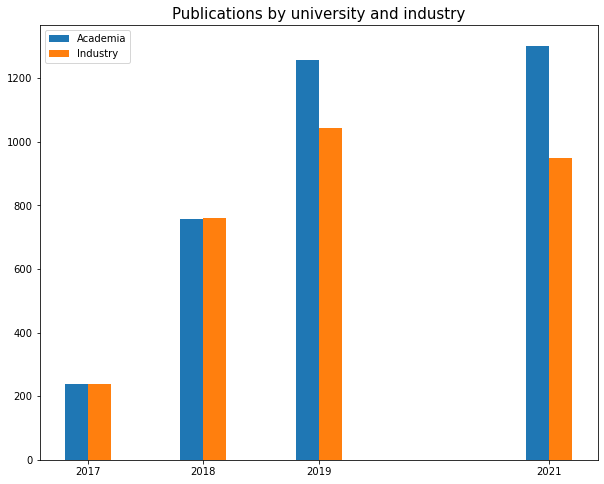

In [62]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(iclr_university.keys()))
bar_width = 0.2
axs.bar(years, iclr_university.values(), width=bar_width, label = 'Academia')
axs.bar(years + bar_width, iclr_industry.values(), width = bar_width, label = 'Industry')
axs.set_xticks(years + bar_width/2)
axs.set_xticklabels(years)
# axs.spines['top'].set_visible(False)
axs.legend(fontsize = 10)
axs.set_title('Publications by university and industry', fontsize = 15)

In [ ]:
x = {1:2, 1:3}

In [ ]:
x

In [ ]:
aff_dict

In [63]:
aff = dict(sorted(aff_dict.items(), key = op.itemgetter(1)))

In [64]:
nips_2017

['epfl',
 'university of bern',
 'epfl',
 'switzerland',
 'swiss federal institute of technology zurich (ethz)',
 'eth zürich',
 'eth zurich',
 'carnegie mellon university',
 'cmu',
 'facebook ai research',
 'facebook',
 'university college london',
 'university of genova',
 'university of genova- mit - iit',
 'iit & ucl',
 'irisa / university south brittany',
 'université côte dazur',
 'university of saint-etienne',
 'univ. lyon',
 'lab. h curien',
 'france',
 'université de rouen normandie',
 'tsinghua university',
 'stanford university',
 'tsinghua university',
 'uic',
 'stanford university',
 'virginia tech',
 'fair and georgia tech',
 'stanford university & google',
 'eth zurich',
 'eth zurich',
 'eth zurich',
 'eth zurich',
 'sutd',
 'mit',
 'cornell university and google brain',
 'google brain',
 'uber',
 'google brain',
 'idsia',
 'the swiss ai lab - idsia',
 'swiss ai lab',
 'idsia (usi & supsi) - nnaisense',
 'stanford university',
 'stanford university',
 'stanford',
 'stanf

In [65]:
aff

{"' University of Bristol'": 1,
 "'U.C. Berkeley'": 1,
 "'Ensae - Criteo Labs'": 1,
 "' University of Texas at Aus'": 1,
 "Moscow State University'": 1,
 "'Weierstrass Institute for Appl'": 1,
 "'Sharif University of Technolog'": 1,
 "'CNRS and DMA'": 1,
 "'HUAZHONG UNIVERSITY OF SCIENCE'": 1,
 "'Brain of Things'": 1,
 "'ICREA - Universitat Pompeu Fabra'": 1,
 "'Cognitive Neuroscience Center'": 1,
 "'Centre de Neurosciences Cognitives'": 1,
 "'Uber Advanced Technologies Center'": 1,
 "'UJM Saint-Etienne'": 1,
 "'University Jean Monnet'": 1,
 "'Harvard University and Twitter'": 1,
 "'Ambiata'": 1,
 "'Stats'": 1,
 "'TECHNICAL UNIVERSITY OF CRETE'": 1,
 "'Université catholique de Louva'": 1,
 "'Radcliffe Institute'": 1,
 "'Orcam'": 1,
 "'Rutgers University and Amazon'": 1,
 "'LIONS": 1,
 "'National University of Singapo'": 1,
 "' University of Nottingham'": 1,
 "'IPHT Saclay'": 1,
 "'Ecole Normale Supérieure de Lyon'": 1,
 "' University of Warick'": 1,
 "'Mitsubishi Electric Research Labs

In [66]:
aff_keys = list(aff.keys())

In [67]:
for i,key in enumerate(aff_keys):
    key_n = key
    key_n = key_n.lower().replace("'",'').replace("'",'').replace('"','')
    aff[key_n] = aff.pop(key)

In [68]:
aff_keys = list(aff.keys())

In [69]:
aff_keys

[' university of bristol',
 'u.c. berkeley',
 'ensae - criteo labs',
 ' university of texas at aus',
 'moscow state university',
 'weierstrass institute for appl',
 'sharif university of technolog',
 'cnrs and dma',
 'huazhong university of science',
 'brain of things',
 'icrea - universitat pompeu fabra',
 'cognitive neuroscience center',
 'centre de neurosciences cognitives',
 'uber advanced technologies center',
 'ujm saint-etienne',
 'university jean monnet',
 'harvard university and twitter',
 'ambiata',
 'stats',
 'technical university of crete',
 'université catholique de louva',
 'radcliffe institute',
 'orcam',
 'rutgers university and amazon',
 'lions',
 'national university of singapo',
 ' university of nottingham',
 'ipht saclay',
 'ecole normale supérieure de lyon',
 ' university of warick',
 'mitsubishi electric research labs (merl)',
 'university of electronic science & technology of china',
 'ant financial service group',
 'pku',
 'teesside university',
 'pindrop securi

In [70]:
industry_kewords = ['google','microsoft','adobe','amazon','deepmind','ai','research','systems','nvidia','amd']

In [ ]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(nips_collab.keys()))
bar_width = 0.2
axs.bar(years, nips_collab.values(), width=bar_width, label = 'Collaboration')
axs.set_xticks(years)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Collaborations between university and industry', fontsize = 15)

In [ ]:
years

In [ ]:
industry = pd.DataFrame(columns=['keywords'])
industry['keywords'] = industry_kewords

In [ ]:
industry

In [ ]:
industry.to_csv(data_dir + 'industry_keywords.csv')

# Collaboration of UCSD with industry 

In [ ]:
'uc san diego' in nips_2017

In [ ]:
'ucsd' in nips_2017

In [ ]:
'university of california san diego' in nips_2017

In [ ]:
'university of california, san diego' in nips_2017

In [ ]:
affil_nips_2017[0]

In [ ]:
type(affil_nips_2017[0])

In [ ]:
x = affil_nips_2017[0]

In [ ]:
x =x.replace("'",'').replace("'",'').replace('"','').replace('"','').replace('[','').replace(']','')

In [ ]:
x

In [71]:
def get_affiliations(aff): 
    for i in range(len(aff)): 
        aff[i] = aff[i].replace("'",'').replace("'",'').replace('"','').replace('"','').replace('[','').replace(']','').lower()
        

In [72]:
get_affiliations(affil_nips_2017)
get_affiliations(affil_nips_2018)
get_affiliations(affil_nips_2019)
get_affiliations(affil_nips_2020)

In [73]:
affil_nips_2017

array(['epfl, university of bern, epfl, switzerland',
       'swiss federal institute of technology zurich (ethz), eth zürich, eth zurich',
       'carnegie mellon university, cmu',
       'facebook ai research, facebook',
       'university college london, university of genova, university of genova- mit - iit, iit & ucl',
       'irisa / university south brittany, université côte dazur, university of saint-etienne, univ. lyon, lab. h curien, france, université de rouen normandie',
       'tsinghua university, stanford university, tsinghua university, uic',
       'stanford university, virginia tech, fair and georgia tech, stanford university & google',
       'eth zurich, eth zurich, eth zurich', 'eth zurich, sutd, mit',
       'cornell university and google brain, google brain, uber, google brain',
       'idsia, the swiss ai lab - idsia, swiss ai lab, idsia (usi & supsi) - nnaisense',
       'stanford university, stanford university, stanford, stanford.edu',
       'national taiwan 

In [75]:
nips_collab = {2017:0, 2018:0,2019:0,2020:0}
years = list(nips_collab.keys())
names = [affil_nips_2017,affil_nips_2018,affil_nips_2019,affil_nips_2020]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in uni_keywords) and any(key in temp[j] for key in industry_kewords): 
            nips_collab[year]+=1

In [76]:
nips_collab

{2017: 215, 2018: 294, 2019: 449, 2020: 613}

Text(0.5, 1.0, 'Collaborations between university and industry')

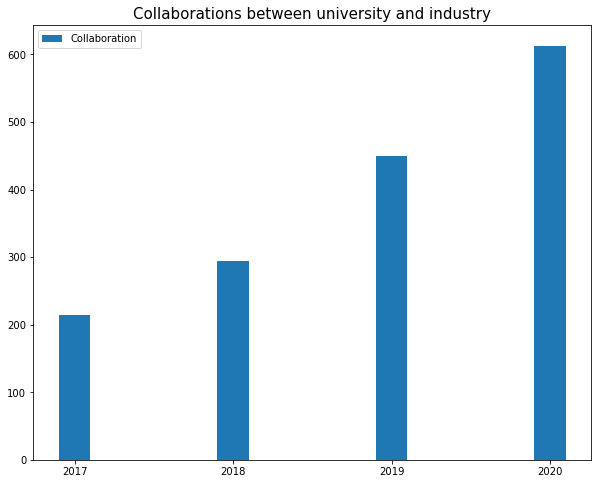

In [77]:
fig,axs = subplots(figsize = (10,8))
years = np.asarray(list(nips_collab.keys()))
bar_width = 0.2
axs.bar(years, nips_collab.values(), width=bar_width, label = 'Collaboration')
axs.set_xticks(years)
axs.set_xticklabels(years)
axs.legend(fontsize = 10)
axs.set_title('Collaborations between university and industry', fontsize = 15)

In [81]:
ucsd_nips_collab = {2017:0, 2018:0,2019:0,2020:0}
ucsd_key = ['ucsd', 'uc san diego', 'university of california san diego',\
            'university of california at san diego','university of california, san diego','university of california']
years = list(ucsd_nips_collab.keys())
names = [affil_nips_2017,affil_nips_2018,affil_nips_2019,affil_nips_2020]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in ucsd_key) and any(key in temp[j] for key in industry_kewords): 
            ucsd_nips_collab[year]+=1

In [82]:
ucsd_nips_collab

{2017: 8, 2018: 6, 2019: 20, 2020: 23}

In [ ]:
ucsd_nips = {2017:0, 2018:0,2019:0,2020:0}
ucsd_key = ['ucsd', 'uc san diego', 'univerisity of california san diego','univerisity of california, san diego','univerisity of california']
years = list(ucsd_nips.keys())
names = [affil_nips_2017,affil_nips_2018,affil_nips_2019,affil_nips_2020]
for i in range(len(names)):
    year = years[i]
    temp = names[i]
    for j in range(len(temp)):
        if any(key in temp[j] for key in ucsd_key) : 
            ucsd_nips[year]+=1

In [ ]:
ucsd_nips